# 1. Tensorflow 로 MNIST 구현하기(CNN)

MNIST 는 흑백의 이미지로 1개의 channel을 가지고 28*28 size를 지닌다.

MLP의 경우 평면 자체로 이를 받아 들일수 없었기 때문에 
shape(-1, 28*28) 나 `flatten()`을 이용하였다.

CNN 의 경우 filter를 이용하여 주변 수용 영역이 합쳐지면서 이미지를 구현하게 된다.

feature map의 특징은 이미지의 공간 정보(연관성)을 가지고 있다는 것이다. 

CNN은 
- CONV 과정과 activation 과정이 섞여 있는 layer
- Pooling 과정 ( feature map 의 사이즈를 줄임 따라서 대신 channel 수는 그대로)


In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [2]:
# 데이터 로드

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# conv layer에 넣어주기 위해서 28x28을 28x28x1 형태로 변경해야한다.
# Nomalization

train_images = train_images.reshape((60000, 28,28,1)) / 255. # 값이 너무 크면 학습이 잘 되지 않음.
test_images = test_images.reshape((10000, 28,28,1)) / 255.

In [7]:
input_shape = train_images.shape[1:]

In [9]:

model = models.Sequential([
    # 특성추출 (Filtering)
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
     # 64개의 특성을 추출할수 있는 filter(channel)과 3x3 filtersize를 이용하여 26x26 size의 feature map을 channel 64개로 생성한다.
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),

    # classifycation step
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax'),

])

In [10]:
model.compile(optimizer = 'adam',
             loss='sparse_categorical_crossentropy',
             metrics =['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5, validation_split = 0.2)

# 2. 유방암데이터 분류하기(DNN)

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

## data load ##

# 유방암 data를 불러온 후, cancer 변수에 담아보자.
cancer = load_breast_cancer()

# 유방암 data를 학습용과 검증용 데이터 세트로 분리해보자.
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   test_size=0.3, shuffle = True)

In [14]:
# 모델링
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'), # 커도 문제가 없지만 작아지는게 괜찮다 --> overfitting 의 방지
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid') # 이진 분류이기 때문

])

In [15]:
# 컴파일링
model.compile(
    optimizer = 'adam',     # 정답이 정해져 있음 적당히 고르면 된다.
    loss = 'binary_crossentropy', # 적당히 고르면 안됨. --> 어떤 분류이냐에 따라 결정해줘야한다.
    metrics = 'accuracy'
)

### Sparse Categorical Cross-Entropy : 정수 형태의 레이블
### Categorical Cross-Entropy : 원-핫 인코딩된 레이블

In [16]:
# 학습
history = model.fit(X_train, y_train, epochs = 10, batch_size = 64)
# 최적화 과정을 수행할 때 epochs나 batch _size를 변경하며 성능을 비교한다.

Epoch 1/10
7/7 [==============================] - 1s 4ms/step - loss: 6.6431 - accuracy: 0.4246
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 3.3170 - accuracy: 0.5126
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 1.0251 - accuracy: 0.6859
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 0.6267 - accuracy: 0.7764
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 0.3782 - accuracy: 0.8618
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 0.4324 - accuracy: 0.8518
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 0.2960 - accuracy: 0.8869
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 0.2824 - accuracy: 0.8894
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 0.2852 - accuracy: 0.8920
Epoch 10/10
7/7 [==============================] - 0s 3ms/step - loss: 0.2593 - accuracy: 0.8920


In [21]:
# 검증 데이터에 대한 예측 수행
y_pred = model.predict(X_test)
y_pred[0]

6/6 [==============================] - 0s 2ms/step


array([6.179199e-10], dtype=float32)

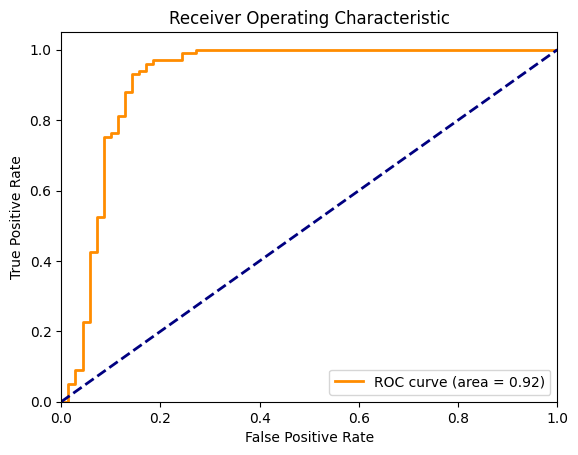

In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC 곡선 그리기
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 3. Fashion MNIST 구현하기



```
Pytorch의 경우는 깊은 모델을 만들때 class 를 사용한다.

- class 적인 장점 모듈의 재사용성, 유연성과 확정성
- 그것과는 별개로 파이토치는 자체적인 내부 구조와 API 가지고 있기때문에 클래스를 사용하는 것이 더욱 자연스러운 설계방식이다.
```

### tensorflow 로 구현하기

In [25]:
## data load

fashion = tf.keras.datasets.fashion_mnist
fashion_data = fashion.load_data()

(train_imgs, train_labels), (test_imgs, test_labels) = fashion_data

4422102/4422102 [==============================] - 0s 0us/step


In [26]:
train_imgs.shape, train_labels.shape, test_imgs.shape, test_labels.shape

## 28*28 흑백 데이터 60000개    train
## 28*28 흑백 데이터 10000개    test

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [27]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [28]:
## 모델 구축

import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 클래스 개수에 맞는 출력층 설정
])

In [29]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_7 (Dense)             (None, 64)               

In [31]:
history = model.fit(train_images, train_labels, epochs=5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 66s 43ms/step - loss: 2.3032 - accuracy: 0.0986 - val_loss: 2.3028 - val_accuracy: 0.1013
Epoch 2/5
1500/1500 [==============================] - 47s 31ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.1003
Epoch 3/5
1500/1500 [==============================] - 46s 31ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 4/5
1500/1500 [==============================] - 47s 31ms/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3026 - val_accuracy: 0.1027
Epoch 5/5
1500/1500 [==============================] - 49s 33ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3027 - val_accuracy: 0.1002


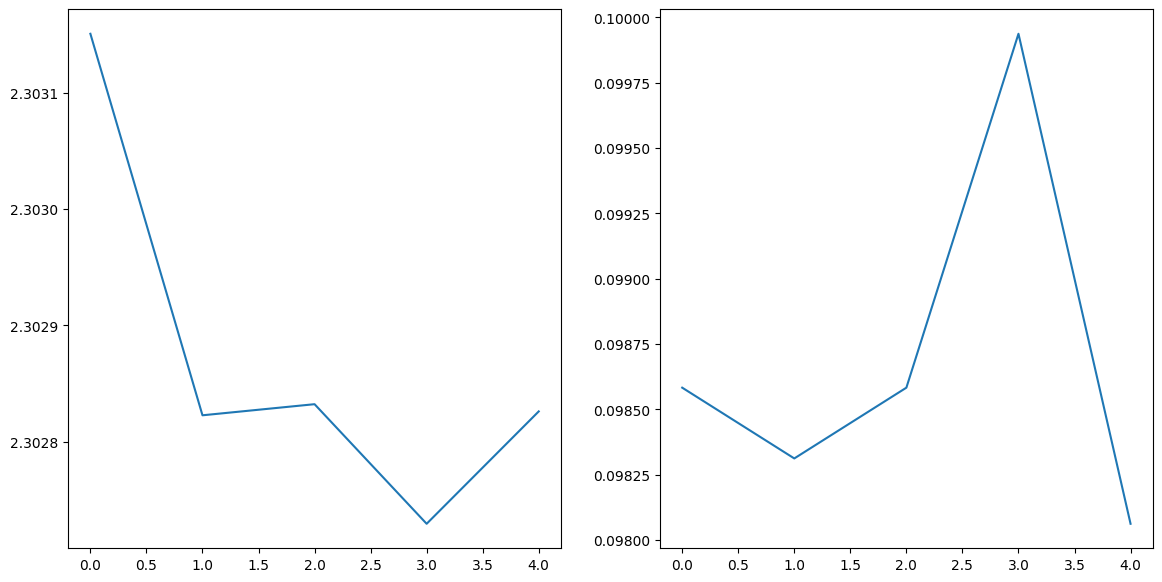

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2,
                       figsize=[14, 7])

ax[0].plot(history.history['loss'])
ax[1].plot(history.history['accuracy'])

In [49]:
## 하나의 데이터를 뽑아 예측 값과 비교하기
import numpy as np
sample_idx = 43
y_test_pred = model.predict(test_imgs[sample_idx].reshape(1, 28, 28, 1))
# print(y_test_pred)
print(label_names[np.argmax(y_test_pred)])
print(label_names[test_labels[sample_idx]])

1/1 [==============================] - 0s 32ms/step
T-shirt/top
Sneaker


### 파이토치로 구현

In [51]:
import torch
from torchvision import datasets, transforms

# 데이터 전처리
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Fashion MNIST 데이터셋 로드
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# 데이터 로더 생성
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


100%|██████████| 26421880/26421880 [00:02<00:00, 11918757.83it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 203950.48it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3773880.23it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15184442.33it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [50]:
import torch
import torch.nn as nn

# 모델 구축
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 모델 인스턴스 생성
model = CNN()

# 모델 요약 정보 출력
print(model)


CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
# 모델 학습
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

1: 입력 채널 수 (입력 이미지의 채널 수)
32: 출력 채널 수 (합성곱 필터의 개수, 즉 출력 이미지의 채널 수)
3: 커널 크기 (합성곱 필터의 크기)
padding=1: 패딩 크기 (입력 이미지 주변에 가상의 원소를 추가하여 출력 크기를 조정하는데 사용되는 값)


합성곱 레이어에 입력 데이터로 (batch_size, channels, height, width) 크기의 텐서를 전달할 때 batch_size는 명시적으로 지정되어야 합니다. 이는 미니배치 단위로 데이터를 처리하기 때문에 필요한 정보입니다.

파이토치에서도 모델 학습 과정에서 배치사이즈를 정할 수 있습니다. 일반적으로 모델 구축 단계에서 배치사이즈를 지정하는 이유는 다음과 같습니다:

모델 구조 설계: 모델을 구축할 때 배치사이즈를 고려하는 것은 모델의 입력 크기를 결정하는 중요한 요소입니다. 배치사이즈를 모델 구조에 포함시키면, 모델의 첫 번째 차원인 배치 차원을 고정하고 나머지 차원은 유동적으로 처리할 수 있게 됩니다.

하이퍼파라미터 튜닝: 배치사이즈는 모델 학습 시에 중요한 하이퍼파라미터입니다. 적절한 배치사이즈를 선택하여 모델을 학습하면 학습 속도와 일반화 성능에 영향을 줄 수 있습니다. 따라서 모델 구축 단계에서 배치사이즈를 지정함으로써 하이퍼파라미터 튜닝에 용이하게 할 수 있습니다.

메모리 관리: 모델 학습 시에는 모델 파라미터와 그래디언트를 메모리에 유지해야 합니다. 배치사이즈를 모델 구조에 포함하여 메모리 사용량을 예측하고 최적화할 수 있습니다. 작은 배치사이즈를 선택하면 메모리 사용량을 줄이고, 큰 배치사이즈를 선택하면 병렬 처리와 메모리 사용량 감소를 통해 학습 속도를 향상시킬 수 있습니다.

물론, 파이토치에서도 모델을 학습할 때 배치사이즈를 지정하여 미니배치 단위로 데이터를 공급할 수 있습니다. 이는 DataLoader와 같은 데이터 로더를 사용하여 구현할 수 있습니다. 배치사이즈를 지정하는 방법은 모델 학습 단계에서 데이터 로더에 인자로 전달하여 설정할 수 있습니다.

In [ ]:
# 테스트 데이터 중 하나 선택
sample_index = 0
sample_image, sample_label = test_dataset[sample_index]
sample_image = sample_image.unsqueeze(0)

# 예측 수행
model.eval()
with torch.no_grad():
    output = model(sample_image)
    _, predicted = torch.max(output, 1)
    predicted_label = predicted.item()

# 예측 결과와 실제 레이블 비교
print("실제 레이블:", sample_label)
print("예측된 레이블:", predicted_label)

차이

파이토치는 입력사이즈를 지정해주지 않아도 된다.
파이토치의 배치사이즈는 dataload 를 이용해서 실행한다.
fit 함수가 없어서 for 문을 돌린다 --> 자유성이 보장되지만 조금 복잡
